# Project: Analyzing and Predicting Student Academic Performance Based on Study Habits

---

### Description
This project explores how students daily habits, routines, and behaviors influence their academic performance. 
    
The dataset sourced from Kaggle, which includes enhanced information about students’ study habits, sleep patterns, screen time, social media usage, and academic results, the goal is to derive meaningful insights and develop predictive models that can forecast academic performance.


---

### Objective
This project aims to analyze how student habits influence academic performance and to build a model that predicts student grades using behavioral and lifestyle indicators.

---

### Usage
This dataset is often used for:

1. Exploratory data analysis
2. Data Visualization
3. Modeling: Predicting Student Performance

---

### Expected Learning Outcomes

- Analytical insights (Descriptive outcome)
- Clean and Well-Structured Dataset (Preprocessed Output)
- Predictive Model (Machine Learning Outcome)

In [44]:
# Prepare Tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.datasets


from sklearn.model_selection import train_test_split



## Load and Explore Dataset


In [45]:
#Load the data set
df = pd.read_csv('Downloads/archive (1)/enhanced_student_habits_performance_dataset/enhanced_student_habits_performance_dataset.csv')

#preview the dataset
df.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [4]:
# Check for missing value
df.isna().sum()

student_id                       0
age                              0
gender                           0
major                            0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
previous_gpa                     0
semester                         0
stress_level                     0
dropout_risk                     0
social_activity                  0
screen_time                      0
study_environment                0
access_to_tutoring               0
family_income_range              0
parental_support_level           0
motivation_level                 0
exam_anxiety_score               0
learning_style      

In [8]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_education_level       80000 non-null 

In [5]:
#to check numerical and categorical variable

numeric_cols=df.select_dtypes(include=["int64","float64"]).columns.tolist()
categoric_cols=df.select_dtypes(include=["object"]).columns.tolist()

print("Numeric Cols \n",numeric_cols,"\n\n","Categoric Cols \n",categoric_cols)

Numeric Cols 
 ['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'semester', 'stress_level', 'social_activity', 'screen_time', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'time_management_score', 'exam_score'] 

 Categoric Cols 
 ['gender', 'major', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation', 'dropout_risk', 'study_environment', 'access_to_tutoring', 'family_income_range', 'learning_style']


In [12]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


# Descriptive Statistics

In [10]:
# Summary statistics for numerical features
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,stress_level,social_activity,screen_time,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,22.004288,4.174388,2.501366,1.997754,69.967884,7.017417,3.516587,6.804107,3.602448,4.497338,5.012478,2.500225,9.673029,5.479438,5.488525,8.508475,5.499132,89.141350
std,3.745570,2.004135,1.445441,1.155992,17.333015,1.467377,2.291575,1.921579,0.462876,2.295312,1.953174,1.704292,2.780869,2.873327,2.867782,1.796411,2.603534,11.591497
min,16.000000,0.000000,0.000000,0.000000,40.000000,4.000000,0.000000,1.000000,1.640000,1.000000,1.000000,0.000000,0.300000,1.000000,1.000000,5.000000,1.000000,36.000000
25%,19.000000,2.800000,1.200000,1.000000,55.000000,6.000000,2.000000,5.500000,3.270000,2.000000,3.600000,1.000000,7.800000,3.000000,3.000000,7.000000,3.200000,82.000000
50%,22.000000,4.125624,2.500000,2.000000,69.900000,7.000000,4.000000,6.900000,3.790000,5.000000,5.000000,2.000000,9.700000,5.000000,5.000000,10.000000,5.500000,93.000000
75%,25.000000,5.500000,3.800000,3.000000,84.900000,8.000000,6.000000,8.200000,4.000000,7.000000,6.400000,4.000000,11.600000,8.000000,8.000000,10.000000,7.800000,100.000000
max,28.000000,12.000000,5.000000,4.000000,100.000000,12.000000,7.000000,10.000000,4.000000,8.000000,10.000000,5.000000,21.000000,10.000000,10.000000,10.000000,10.000000,100.000000


In [13]:
mode_df = df.mode()
mode_df.head(1)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,25.0,Female,Arts,0.0,3.0,0.3,No,40.9,6.9,...,9.8,Dorm,No,Low,6.0,6.0,10.0,Kinesthetic,2.6,100.0


# Data Visualization 

### 1. Histogram of Exam Score

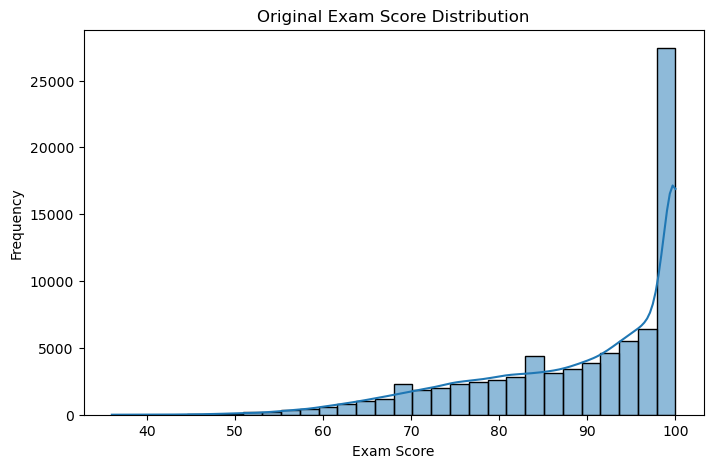

In [19]:
#The distribution of exam score

plt.figure(figsize=(8,5))
sns.histplot(df['exam_score'], bins=30, kde=True)
plt.title('Original Exam Score Distribution')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

### 2. Scatter Plot: to identify if age, stress level, sleep hours, motivation level, previous gpa, exam anxiety, social activity and parental support generally lead to higher exam scores.

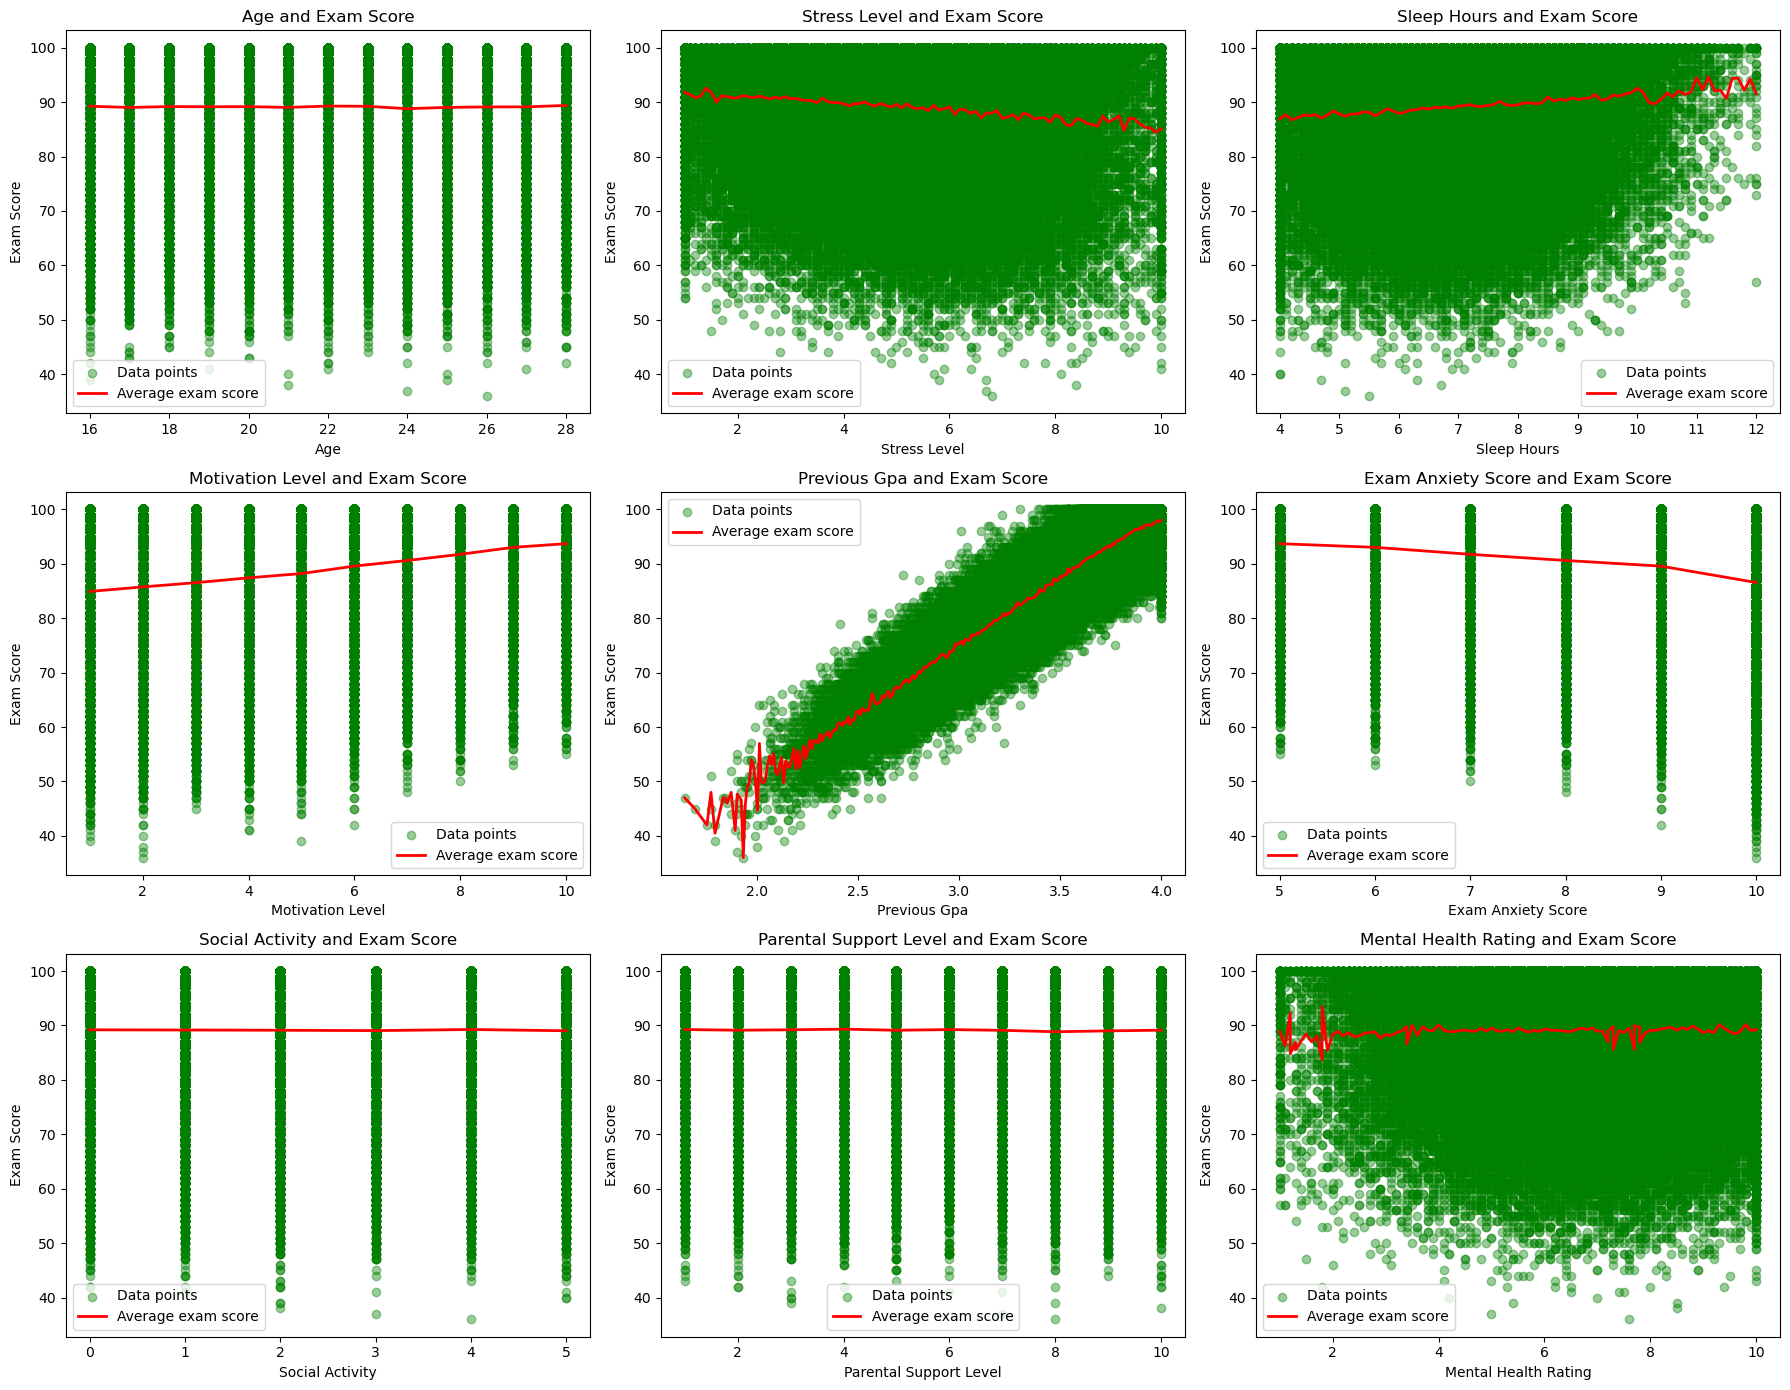

In [16]:
scatter_cols = ["age", "stress_level", "sleep_hours", "motivation_level", "previous_gpa", "exam_anxiety_score","social_activity","parental_support_level","mental_health_rating"]

fig, axs = plt.subplots(3, 3, figsize=(18, 14))  
axs = axs.flatten()  

for idx, col in enumerate(scatter_cols):
    ax = axs[idx]
    
   
    ax.scatter(df[col], df["exam_score"], color="green", alpha=0.4, label="Data points")
    
    
    mean = df.groupby(col)["exam_score"].mean()
    ax.plot(mean.index, mean.values, color="red", linewidth=2, label="Average exam score")
    
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel("Exam Score")
    ax.set_title(f"{col.replace('_', ' ').title()} and Exam Score")
    ax.legend()

plt.tight_layout()
plt.show()

### 3.  Boxplot: to show if students with higher attendance tend to perform better.

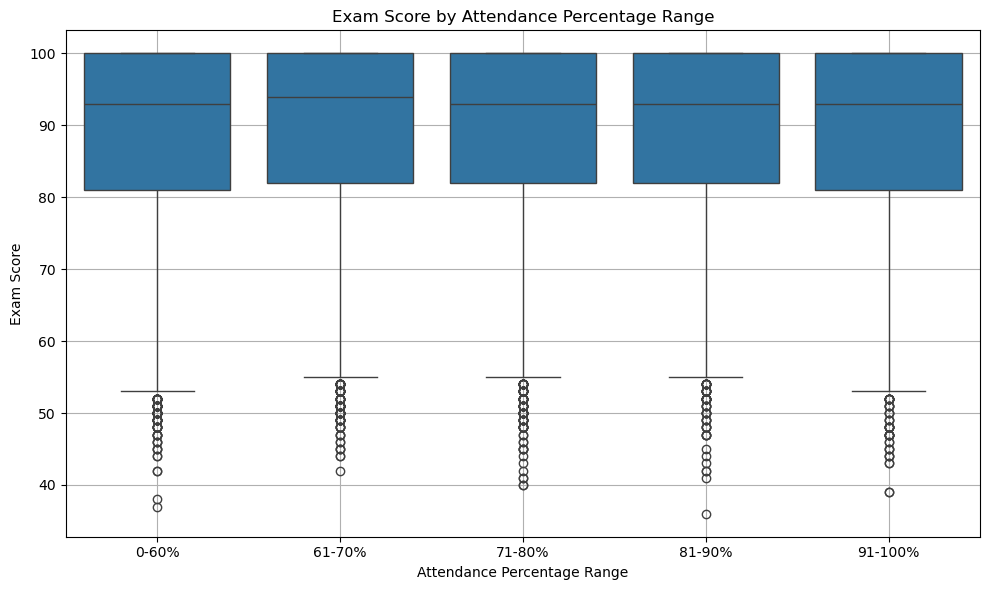

In [15]:
# Create bins for attendance percentage
df["attendance_bin"] = pd.cut(df["attendance_percentage"], bins=[0, 60, 70, 80, 90, 100],
                               labels=["0-60%", "61-70%", "71-80%", "81-90%", "91-100%"])

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="attendance_bin", y="exam_score")
plt.title("Exam Score by Attendance Percentage Range")
plt.xlabel("Attendance Percentage Range")
plt.ylabel("Exam Score")
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Line plot: to assess if better mental health correlates with higher academic performance.

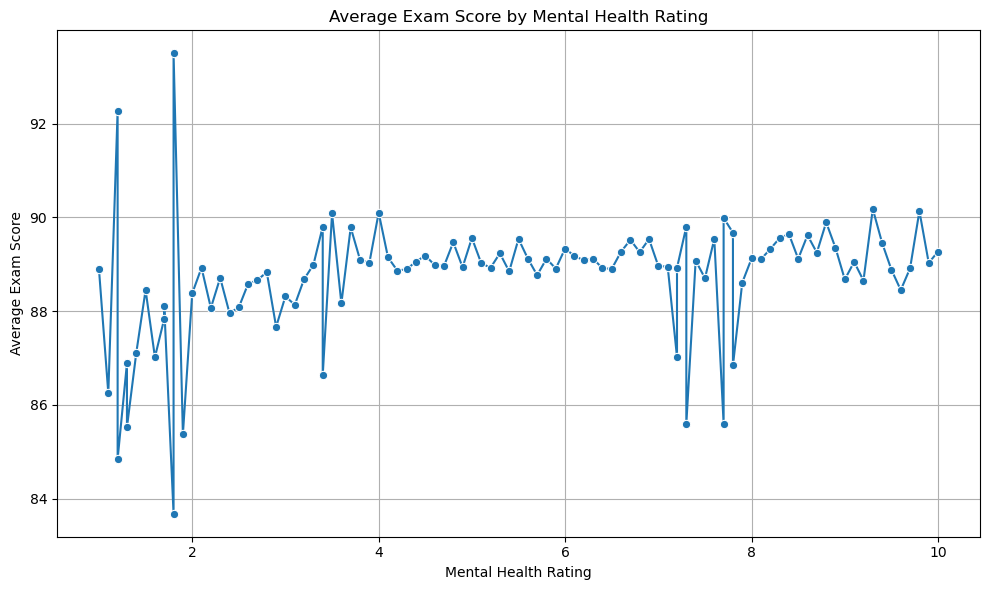

In [30]:
# Group by mental health rating and calculate average exam score
avg_scores = df.groupby("mental_health_rating")["exam_score"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_scores, x="mental_health_rating", y="exam_score", marker="o")
plt.title("Average Exam Score by Mental Health Rating")
plt.xlabel("Mental Health Rating")
plt.ylabel("Average Exam Score")
plt.grid(True)
plt.tight_layout()
plt.show()

### 5. Count plot: to highlights the number of students by major

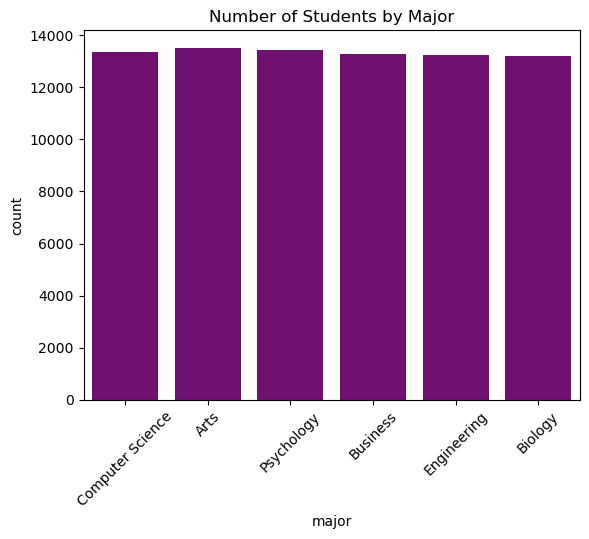

In [59]:
sns.countplot(x="major", data=df, color="purple")
plt.title("Number of Students by Major")
plt.xticks(rotation=45)
plt.show()

### 6. Bar plot: to determine the factors that influenced exam score.

C:\Users\HP\AppData\Local\Temp\ipykernel_10600\2677280682.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='exam_score', data=df, ci=None, color="pink")
C:\Users\HP\AppData\Local\Temp\ipykernel_10600\2677280682.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='study_environment', y='exam_score', data=df, ci=None,
C:\Users\HP\AppData\Local\Temp\ipykernel_10600\2677280682.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='diet_quality', y='exam_score', data=df, order=['Poor', 'Fair', 'Good'], ci=None, color="orange")
C:\Users\HP\AppData\Local\Temp\ipykernel_10600\2677280682.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='part_time_job', y='exam_score', data=df, ci=None, color="green")


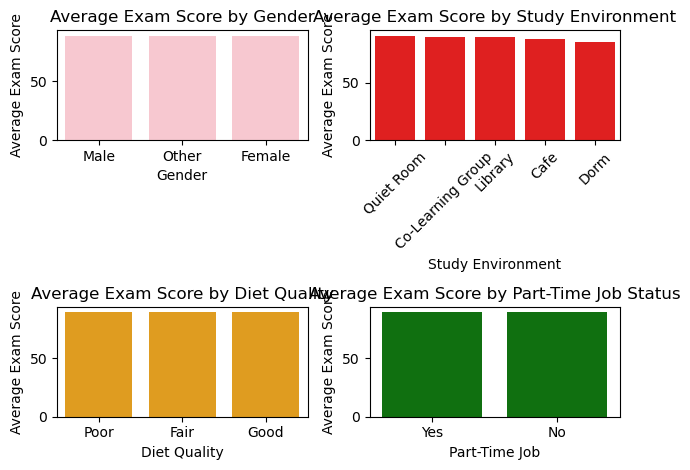

<Figure size 1400x1000 with 0 Axes>

In [13]:
# 1. Average exam score by gender
plt.subplot(2, 2, 1)
sns.barplot(x='gender', y='exam_score', data=df, ci=None, color="pink")
plt.title('Average Exam Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')

# 2. Average exam score by study environment
plt.subplot(2, 2, 2)
sns.barplot(x='study_environment', y='exam_score', data=df, ci=None, 
            order=df.groupby('study_environment')['exam_score'].mean().sort_values(ascending=False).index, color="red")
plt.title('Average Exam Score by Study Environment')
plt.xlabel('Study Environment')
plt.ylabel('Average Exam Score')
plt.xticks(rotation=45)

# 3. Average exam score by diet quality
plt.subplot(2, 2, 3)
sns.barplot(x='diet_quality', y='exam_score', data=df, order=['Poor', 'Fair', 'Good'], ci=None, color="orange")
plt.title('Average Exam Score by Diet Quality')
plt.xlabel('Diet Quality')
plt.ylabel('Average Exam Score')

# 4. Average exam score by part-time job status
plt.subplot(2, 2, 4)
sns.barplot(x='part_time_job', y='exam_score', data=df, ci=None, color="green")
plt.title('Average Exam Score by Part-Time Job Status')
plt.xlabel('Part-Time Job')
plt.ylabel('Average Exam Score')

plt.tight_layout()
plt.figure(figsize=(14, 10))
plt.show()

### Regression Model

#### 1. Prepare the data. Separafe features and target variable, create preprocessing pipeline and split data into training and test sets.

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
# Feature (x), target (y)
x = df.drop('exam_score', axis = 1)
y= df['exam_score']

In [62]:
#This is independent variable (x)
x.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,0,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,5,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,5,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,3,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,2,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1


In [63]:
#This is dependent variable (y)
y.head()

0    100
1     99
2     98
3    100
4     98
Name: exam_score, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

TypeError: float() argument must be a string or a real number, not 'pandas._libs.interval.Interval'

In [66]:
y_pred = lr_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [67]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
print(coefficients)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

#### 2. Build and Evaluate the Regression Model.

##### Insights: The model explains 87% of the variability in exam scores based on the input features (study hours, attendance, sleep, time management, and motivation). This is a strong indication that the selected variables are good predictors of exam performance. On average, the squared difference between the actual and predicted exam scores is 17.55. This means the model makes reasonably accurate predictions, though small errors are present.

#### 4. Model Coefficient

### Visualize Actual Vs Predicted Student Performance

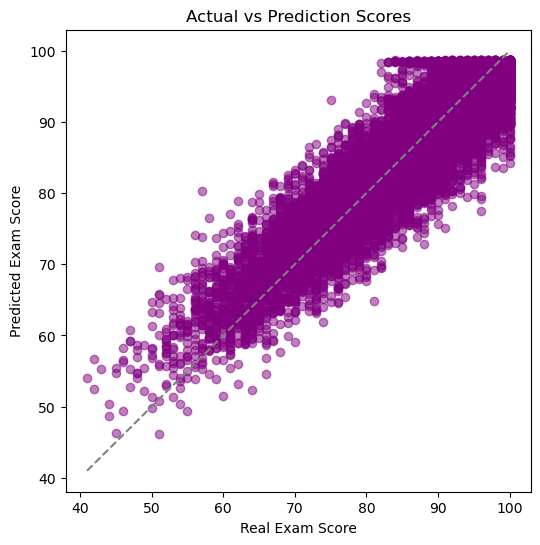

In [46]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color="gray")
plt.xlabel("Real Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Prediction Scores")
plt.show()

##### Insights: Overall, the plot demonstrates that the model provides reliable predictions of exam scores, with most predictions closely matching actual results and only minor deviations or outliers.